## STRONG SCALING

Nell'analisi di strong scaling, il grafico dell'andamento del tempo di esecuzione in relazione al numero di task eseguite dovrebbe mostrare un ideale miglioramento delle prestazioni all'aumentare del numero di task. In altre parole, all'aumentare del numero di task, il tempo di esecuzione dovrebbe diminuire idealmente in modo proporzionale o quasi proporzionale al numero di task aggiunti.

Questo è dovuto al fatto che con una maggiore distribuzione dei compiti tra i processori o i nodi di calcolo, ciascun task richiede meno tempo per essere completato. Tuttavia, esiste un limite a questa scalabilità, e oltre un certo punto l'aggiunta di ulteriori task non produce più un miglioramento significativo delle prestazioni, e il grafico potrebbe stabilizzarsi o addirittura peggiorare.

Idealmente, nel grafico si dovrebbe osservare un calo del tempo di esecuzione fino a un certo punto, indicando una buona scalabilità, seguito da una stabilizzazione o un incremento del tempo di esecuzione, indicando un punto in cui l'overhead di comunicazione e coordinamento tra task supera i benefici ottenuti dalla parallelizzazione aggiuntiva.

## WEAK SCALING

Nell'analisi di weak scaling, il grafico dell'andamento del tempo di esecuzione in relazione al numero totale di task eseguite dovrebbe idealmente rimanere costante o aumentare in modo molto lieve all'aumentare del numero di task, mantenendo costante la dimensione del problema per task.

In altre parole, all'aumentare del numero di task, il tempo di esecuzione dovrebbe rimanere stabile o aumentare solo leggermente. Questo è dovuto al fatto che, in un'analisi di weak scaling, il volume di lavoro aumenta in modo proporzionale al numero di task aggiunti, mantenendo costante il carico di lavoro per ogni task.

Idealmente, se il sistema è configurato correttamente e la comunicazione tra i task è efficiente, il tempo di esecuzione dovrebbe rimanere costante nonostante l'aumento del numero di task.

In pratica, potrebbero esserci variazioni dovute a fattori come l'overhead di comunicazione, la gestione delle risorse del sistema o la saturazione delle risorse con l'aumentare del numero di task. Tuttavia, l'obiettivo nell'analisi di weak scaling è mantenere il tempo di esecuzione il più stabile possibile all'aumentare del numero di task, indicando una buona scalabilità del sistema rispetto alla dimensione del problema.

## STRONG SCALING THIN (MPI) 

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

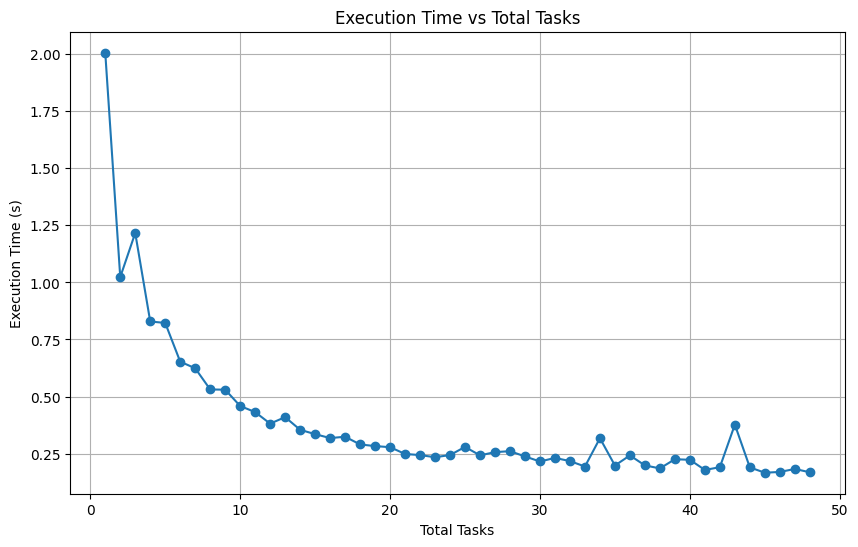

In [96]:
# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_strong_thin.csv")

# Estrai le colonne
x = data["Total Tasks"]
y = data["Execution Time (s)"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Total Tasks')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Total Tasks')

plt.grid(True)
plt.show()


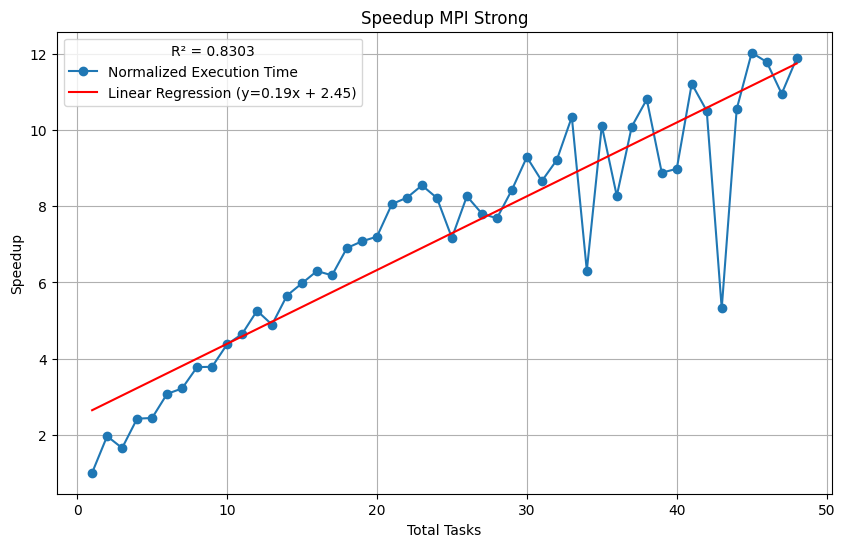

Coefficiente angolare: 0.1938164338865581
Intercetta: 2.448603777670834


In [155]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_strong_thin.csv")

# Estrai le colonne
x = data["Total Tasks"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution Time (s)"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Dividi i tempi di esecuzione per il valore di riferimento
y_normalized = reference_execution_time / y

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Normalized Execution Time')
#plt.plot(x, x, linestyle='--', color='gray', label='Diagonal')

plt.xlabel('Total Tasks')
plt.ylabel('Speedup')
plt.title('Speedup MPI Strong')
plt.legend()

# Imposta l'asse x con incrementi di dieci
#plt.xticks(x.flatten())

# Modello di regressione lineare
regression_model = LinearRegression()
regression_model.fit(x, y_normalized)
y_pred = regression_model.predict(x)

# Plot della regressione lineare
plt.plot(x, y_pred, color='red', linestyle='-', label=f'Linear Regression (y={regression_model.coef_[0][0]:.2f}x + {regression_model.intercept_[0]:.2f})')

# Calcola il coefficiente R²
r_squared = r2_score(speedup, y_pred)

# Aggiungi il valore R² alla legenda
plt.legend(loc='upper left', title=f'R² = {r_squared:.4f}')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
coefficiente_angoalre = regression_model.coef_[0][0]
intercetta = regression_model.intercept_[0]
print("Coefficiente angolare:", coefficiente_angoalre)
print("Intercetta:", intercetta)


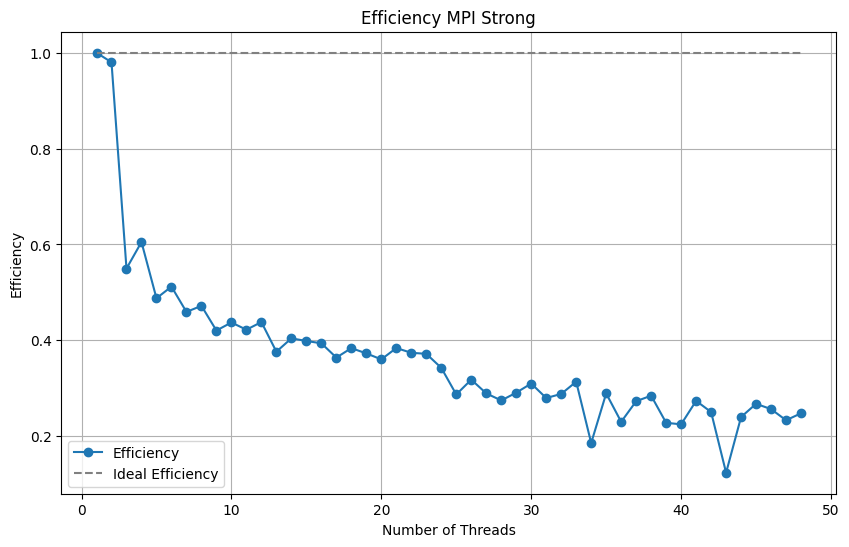

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_strong_thin.csv")

# Estrai le colonne
x = data["Total Tasks"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution Time (s)"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Calcola lo speedup
speedup = reference_execution_time / y

# Calcola l'efficienza
efficiency = speedup / x

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')

plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency MPI Strong')
plt.legend()

# Imposta l'asse x con incrementi di dieci
#plt.xticks(x.flatten())

# Modello di regressione lineare
#regression_model = LinearRegression()
#regression_model.fit(x, efficiency)
#y_pred = regression_model.predict(x)

# Plot della regressione lineare
#plt.plot(x, y_pred, color='red', linestyle='-', label='Linear Regression')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
#coefficiente_angoalre = regression_model.coef_[0][0]
#intercetta = regression_model.intercept_[0]
#print("Coefficiente angolare:", coefficiente_angoalre)
#print("Intercetta:", intercetta)


Quando si utilizza MPI (Message Passing Interface) per l'analisi di strong scaling, il grafico dell'andamento del tempo di esecuzione in relazione al numero di task eseguite dovrebbe inizialmente mostrare un miglioramento delle prestazioni all'aumentare del numero di task. Questo miglioramento è dovuto alla distribuzione dei compiti tra i processori o i nodi di calcolo, con ciascun task che richiede meno tempo per essere completato.

Tuttavia, è importante considerare che con MPI, l'aggiunta di ulteriori task può introdurre un aumento dell'overhead di comunicazione. Questo è particolarmente vero se i task devono scambiarsi una grande quantità di dati o coordinare frequentemente tra loro. Quindi, sebbene inizialmente si possa osservare un miglioramento delle prestazioni, oltre un certo punto l'aggiunta di ulteriori task potrebbe causare un aumento del tempo di esecuzione a causa dell'overhead di comunicazione.

In termini pratici, questo significa che il grafico dell'andamento del tempo di esecuzione potrebbe mostrare un calo del tempo di esecuzione iniziale all'aumentare del numero di task, seguito da una stabilizzazione o addirittura da un aumento del tempo di esecuzione al crescere ulteriore del numero di task. Questo punto di stabilizzazione o inversione potrebbe essere indicativo del punto in cui l'overhead di comunicazione supera i benefici ottenuti dalla parallelizzazione aggiuntiva utilizzando MPI.

## STRONG SCALING THIN (OMP)

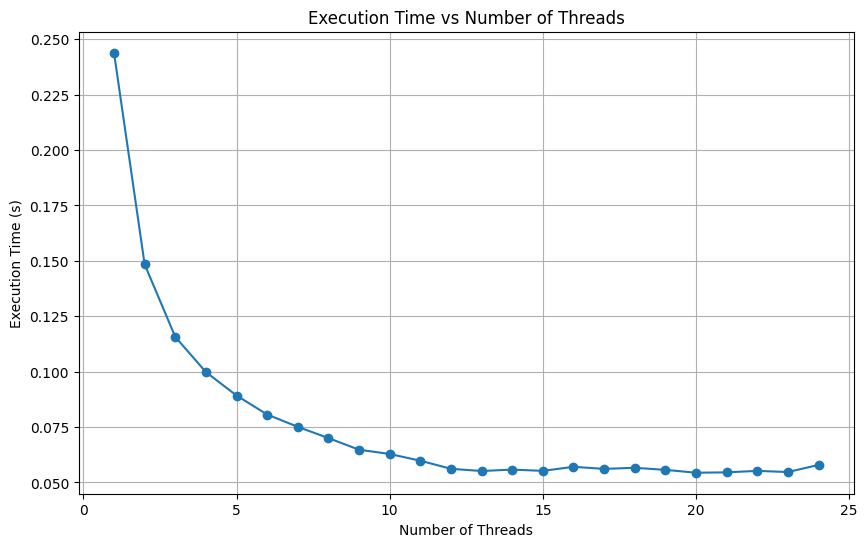

In [157]:
# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_strong_thin.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"]
y = data["Execution_Time"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Number of Threads')



# Imposta l'asse x con incrementi di dieci
#plt.xticks(np.arange(min(x), max(x)+1, 10))

plt.grid(True)
plt.show()

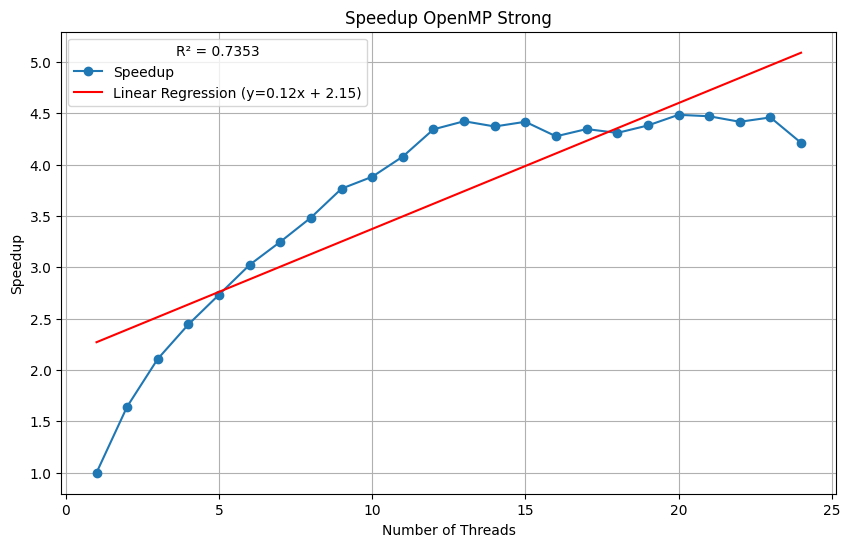

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_strong_thin.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Calcola lo speedup
speedup = reference_execution_time / y

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-', label='Speedup')

plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup OpenMP Strong')

# Modello di regressione lineare
regression_model = LinearRegression()
regression_model.fit(x, speedup)
y_pred = regression_model.predict(x)

# Plot della regressione lineare
plt.plot(x, y_pred, color='red', linestyle='-', label=f'Linear Regression (y={regression_model.coef_[0][0]:.2f}x + {regression_model.intercept_[0]:.2f})')

# Calcola il coefficiente R²
r_squared = r2_score(speedup, y_pred)

# Aggiungi il valore R² alla legenda
plt.legend(loc='upper left', title=f'R² = {r_squared:.4f}')

plt.grid(True)
plt.show()


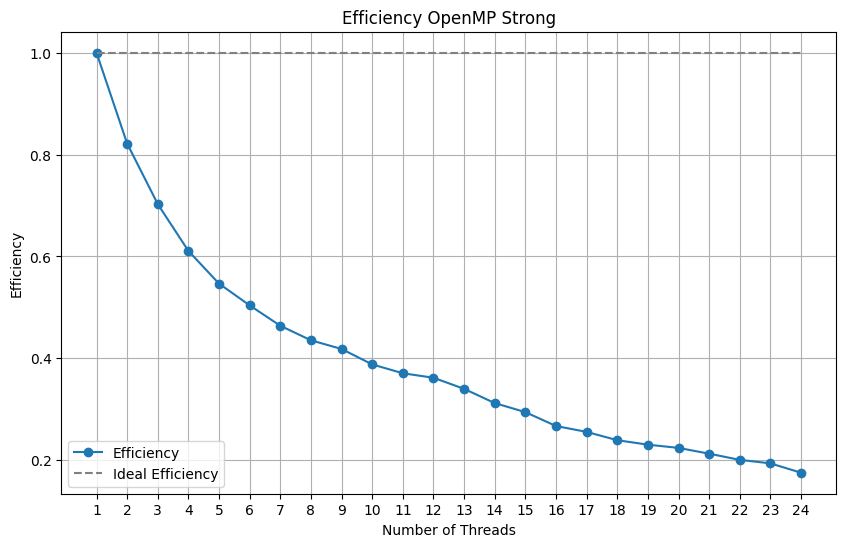

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_strong_thin.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Calcola lo speedup
speedup = reference_execution_time / y

# Calcola l'efficienza
efficiency = speedup / x

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')

plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency OpenMP Strong')
plt.legend()

# Imposta l'asse x con incrementi di uno
plt.xticks(x.flatten())

# Modello di regressione lineare
#regression_model = LinearRegression()
#regression_model.fit(x, efficiency)
#y_pred = regression_model.predict(x)

# Plot della regressione lineare
#plt.plot(x, y_pred, color='red', linestyle='-', label='Linear Regression')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
#coefficiente_angoalre = regression_model.coef_[0][0]
#intercetta = regression_model.intercept_[0]
#print("Coefficiente angolare:", coefficiente_angoalre)
#print("Intercetta:", intercetta)


Quando si utilizza OpenMP (Open Multi-Processing) per l'analisi di strong scaling, il grafico dell'andamento del tempo di esecuzione in relazione al numero di thread utilizzati dovrebbe inizialmente mostrare un miglioramento delle prestazioni all'aumentare del numero di thread. Questo miglioramento è dovuto alla distribuzione dei compiti tra i thread, con ciascun thread che esegue una parte del lavoro in parallelo agli altri.

Tuttavia, esistono alcune considerazioni specifiche per l'utilizzo di OpenMP rispetto a MPI. In OpenMP, l'overhead di comunicazione è generalmente inferiore rispetto a MPI, poiché i thread condividono lo stesso spazio di memoria e possono comunicare tra loro in modo più efficiente. Di conseguenza, l'aggiunta di ulteriori thread può spesso portare a un miglioramento delle prestazioni senza un aumento significativo dell'overhead.

Tuttavia, anche in OpenMP, ci sono limiti alla scalabilità. Il numero ottimale di thread dipende dalla natura del problema, dalle caratteristiche hardware e dalla dimensione dei dati. Inoltre, esistono anche altri fattori da considerare, come la condivisione delle risorse della CPU e la gestione della cache.

Quindi, nel grafico dell'andamento del tempo di esecuzione in relazione al numero di thread, si potrebbe osservare un calo del tempo di esecuzione iniziale all'aumentare del numero di thread, seguito da una stabilizzazione o da un aumento del tempo di esecuzione al crescere ulteriore del numero di thread. Questo punto di stabilizzazione o inversione potrebbe essere indicativo del punto in cui altri fattori, come la condivisione delle risorse o la gestione della cache, iniziano a limitare ulteriormente il miglioramento delle prestazioni.

## WEAK SCALING THIN (MPI)

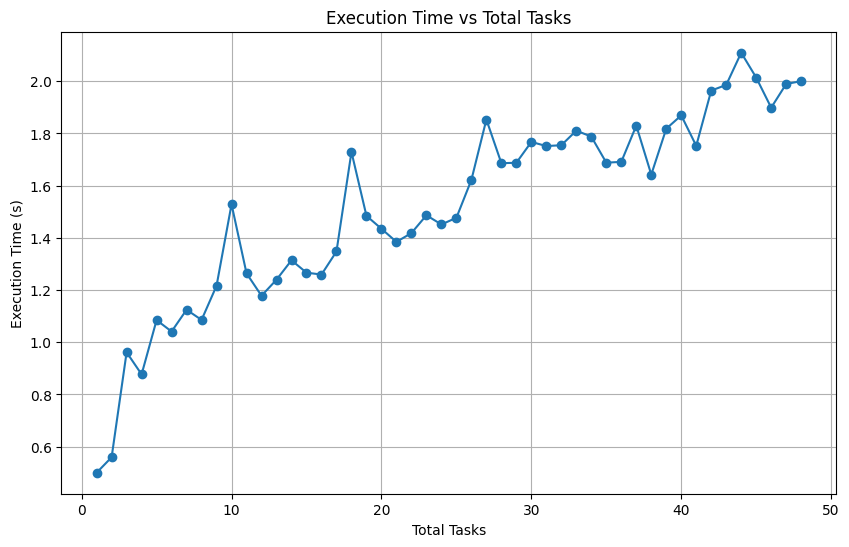

In [98]:
# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_weak_thin.csv")

# Estrai le colonne
x = data["MPI_Processes"]
y = data["Execution_Time"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Total Tasks')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Total Tasks')
plt.grid(True)
plt.show()

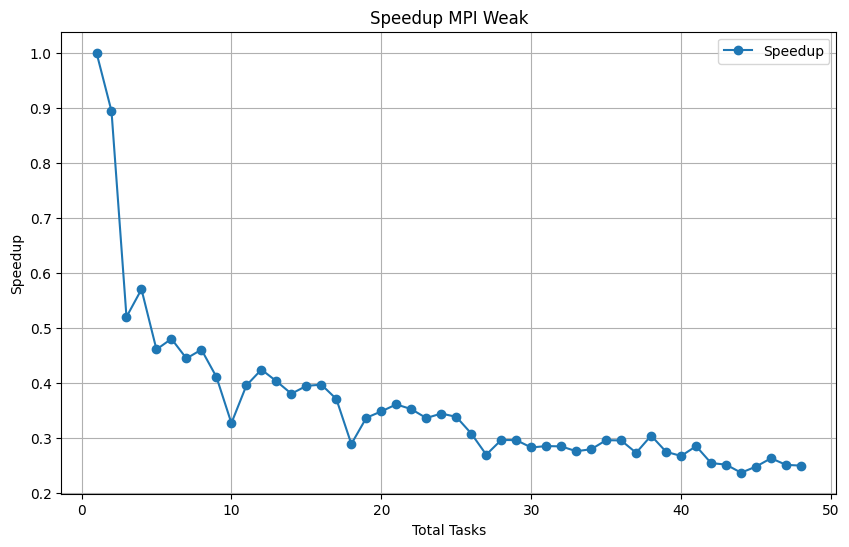

In [158]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_weak_thin.csv")

# Estrai le colonne
x = data["MPI_Processes"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Dividi i tempi di esecuzione per il valore di riferimento
y_normalized = reference_execution_time / y

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Speedup')
#plt.plot(x, x, linestyle='--', color='gray', label='Diagonal')

plt.xlabel('Total Tasks')
plt.ylabel('Speedup')
plt.title('Speedup MPI Weak')
plt.legend()

# Imposta l'asse x con incrementi di dieci
#plt.xticks(x.flatten())

# Modello di regressione lineare
#regression_model = LinearRegression()
#regression_model.fit(x, y_normalized)
#y_pred = regression_model.predict(x)

# Plot della regressione lineare
#plt.plot(x, y_pred, color='red', linestyle='-', label='Linear Regression')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
#coefficiente_angoalre = regression_model.coef_[0][0]
#intercetta = regression_model.intercept_[0]
#print("Coefficiente angolare:", coefficiente_angoalre)
#print("Intercetta:", intercetta)


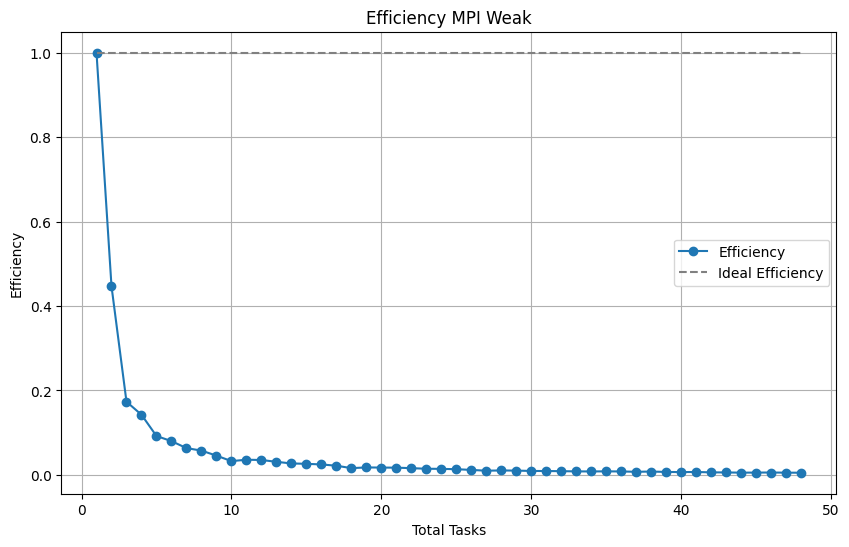

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_weak_thin.csv")

# Estrai le colonne
x = data["MPI_Processes"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Calcola lo speedup
speedup = reference_execution_time / y

# Calcola l'efficienza
efficiency = speedup / x

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')

plt.xlabel('Total Tasks')
plt.ylabel('Efficiency')
plt.title('Efficiency MPI Weak')
plt.legend()

# Imposta l'asse x con incrementi di dieci
#plt.xticks(x.flatten())

# Modello di regressione lineare
#regression_model = LinearRegression()
#regression_model.fit(x, efficiency)
#y_pred = regression_model.predict(x)

# Plot della regressione lineare
#plt.plot(x, y_pred, color='red', linestyle='-', label='Linear Regression')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
#coefficiente_angoalre = regression_model.coef_[0][0]
#intercetta = regression_model.intercept_[0]
#print("Coefficiente angolare:", coefficiente_angoalre)
#print("Intercetta:", intercetta)


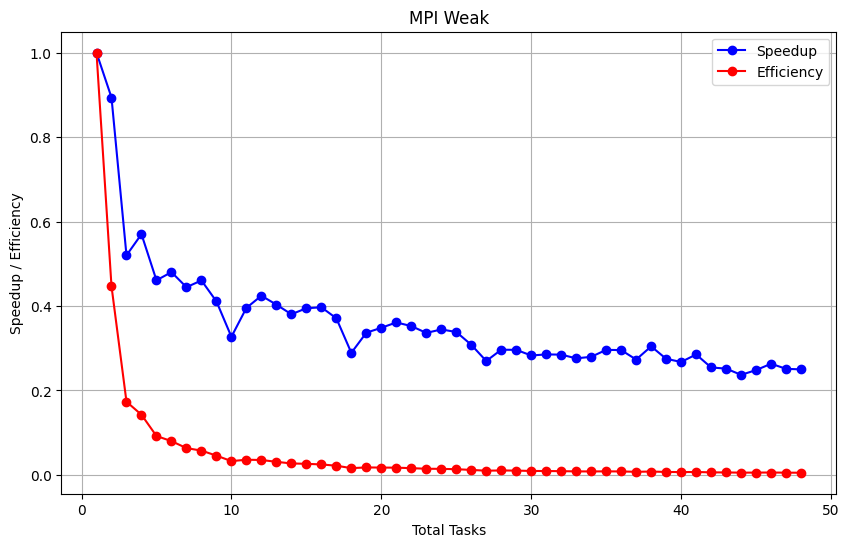

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_weak_thin.csv")

# Estrai le colonne
x = data["MPI_Processes"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Calcola lo speedup
speedup = reference_execution_time / y

# Calcola l'efficienza
efficiency = speedup / x

# Plotta i dati
plt.figure(figsize=(10, 6))

# Plot dello speedup
plt.plot(x, speedup, marker='o', linestyle='-', color='blue', label='Speedup')

# Plot dell'efficienza
plt.plot(x, efficiency, marker='o', linestyle='-', color='red', label='Efficiency')

plt.xlabel('Total Tasks')
plt.ylabel('Speedup / Efficiency')
plt.title('MPI Weak')
plt.legend()
plt.grid(True)
plt.show()


Nell'analisi di weak scaling con MPI (Message Passing Interface), il grafico dell'andamento del tempo di esecuzione in relazione al numero totale di task eseguite dovrebbe idealmente mantenere una tendenza stabile o leggermente crescente all'aumentare del numero di task.

Poiché in un'analisi di weak scaling la dimensione del problema per task rimane costante mentre il numero di task aumenta, il volume di lavoro totale aumenta linearmente con il numero di task. In un sistema scalabile, questo aumento lineare del volume di lavoro dovrebbe essere gestito in modo efficiente in modo che il tempo di esecuzione rimanga stabile o aumenti solo leggermente.

Tuttavia, è importante considerare l'overhead di comunicazione con MPI. Aumentando il numero di task, potrebbe aumentare anche l'overhead di comunicazione necessario per coordinare e sincronizzare i task. Questo può portare a un aumento del tempo di esecuzione, anche se l'incremento dovrebbe essere limitato in un sistema ben progettato e ottimizzato.

Quindi, nel grafico, potrebbe essere osservato un leggero aumento del tempo di esecuzione all'aumentare del numero totale di task, ma idealmente questo aumento dovrebbe essere graduale e limitato, indicando una buona scalabilità del sistema nell'analisi di weak scaling.

## WEAK SCALING THIN (OMP)

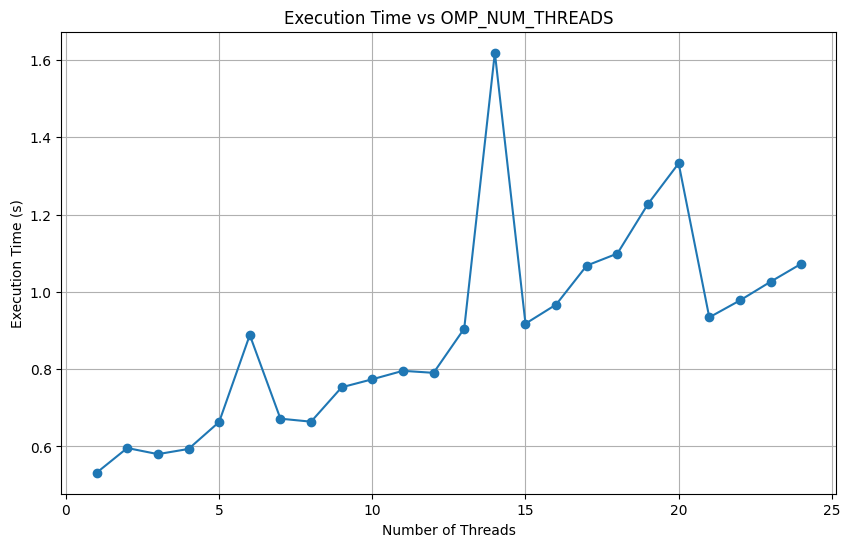

In [143]:
# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_weak_thin.csv")

# Estrai le colonne
threads = data["OMP_NUM_THREADS"]
execution_times = data["Execution_Time"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(threads, execution_times, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs OMP_NUM_THREADS')
plt.grid(True)
plt.show()


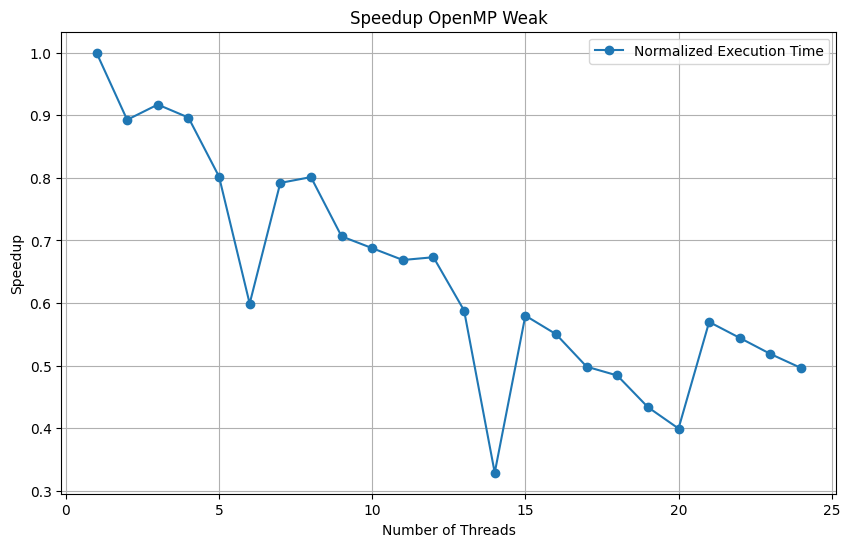

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_weak_thin.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Dividi i tempi di esecuzione per il valore di riferimento
y_normalized = reference_execution_time / y

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Normalized Execution Time')
#plt.plot(x, x, linestyle='--', color='gray', label='Diagonal')

plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup OpenMP Weak')
plt.legend()

# Imposta l'asse x con incrementi di dieci
#plt.xticks(x.flatten())

# Modello di regressione lineare
#regression_model = LinearRegression()
#regression_model.fit(x, y_normalized)
#y_pred = regression_model.predict(x)

# Plot della regressione lineare
#plt.plot(x, y_pred, color='red', linestyle='-', label='Linear Regression')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
#coefficiente_angoalre = regression_model.coef_[0][0]
#intercetta = regression_model.intercept_[0]
#print("Coefficiente angolare:", coefficiente_angoalre)
#print("Intercetta:", intercetta)


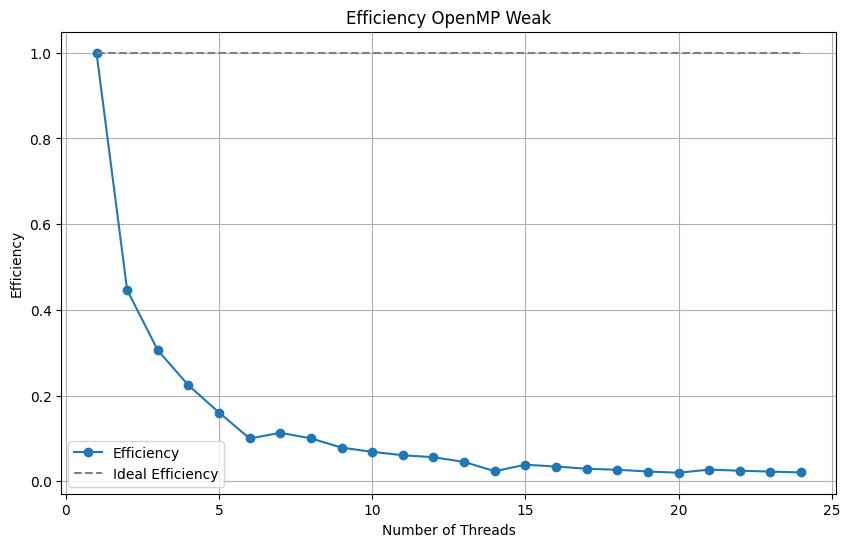

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_weak_thin.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Calcola lo speedup
speedup = reference_execution_time / y

# Calcola l'efficienza
efficiency = speedup / x

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')

plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency OpenMP Weak')
plt.legend()

# Imposta l'asse x con incrementi di uno
#plt.xticks(x.flatten())

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
# coefficiente_angoalre = regression_model.coef_[0][0]
# intercetta = regression_model.intercept_[0]
# print("Coefficiente angolare:", coefficiente_angoalre)
# print("Intercetta:", intercetta)


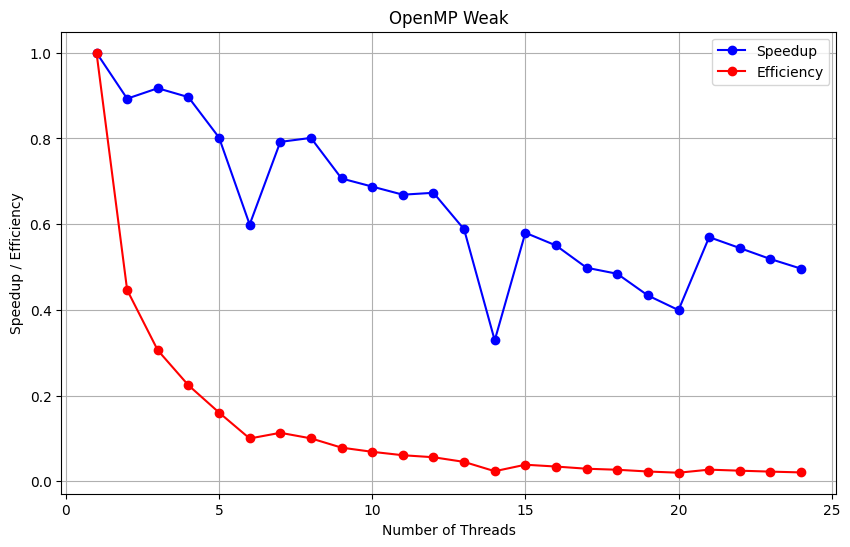

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_weak_thin.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Calcola lo speedup
speedup = reference_execution_time / y

# Calcola l'efficienza
efficiency = speedup / x

# Plotta i dati
plt.figure(figsize=(10, 6))

# Plot dello speedup
plt.plot(x, speedup, marker='o', linestyle='-', color='blue', label='Speedup')

# Plot dell'efficienza
plt.plot(x, efficiency, marker='o', linestyle='-', color='red', label='Efficiency')

plt.xlabel('Number of Threads')
plt.ylabel('Speedup / Efficiency')
plt.title('OpenMP Weak')
plt.legend()
plt.grid(True)
plt.show()


Nell'analisi di weak scaling con OpenMP (Open Multi-Processing), il grafico dell'andamento del tempo di esecuzione in relazione al numero totale di thread utilizzati dovrebbe mostrare un aumento graduale del tempo di esecuzione all'aumentare del numero di thread, mantenendo costante la dimensione del problema per thread.

Poiché in un'analisi di weak scaling la dimensione del problema per thread rimane costante mentre il numero di thread aumenta, il volume di lavoro totale aumenta linearmente con il numero di thread. In un sistema scalabile, questo aumento lineare del volume di lavoro dovrebbe essere gestito in modo efficiente in modo che il tempo di esecuzione aumenti solo leggermente.

Tuttavia, è importante considerare la gestione delle risorse del sistema. L'aumento del numero di thread può portare a una saturazione delle risorse della CPU, come la cache o le unità di esecuzione, che potrebbe rallentare le prestazioni complessive. Inoltre, la condivisione delle risorse tra i thread può portare a un overhead significativo, specialmente se i thread devono competere per risorse crittografiche come la cache.

Quindi, nel grafico, potrebbe essere osservato un aumento graduale del tempo di esecuzione all'aumentare del numero totale di thread, ma idealmente questo aumento dovrebbe essere limitato, indicando una buona scalabilità del sistema nell'analisi di weak scaling con OpenMP.

## STRONG SCALING EPYC (MPI)

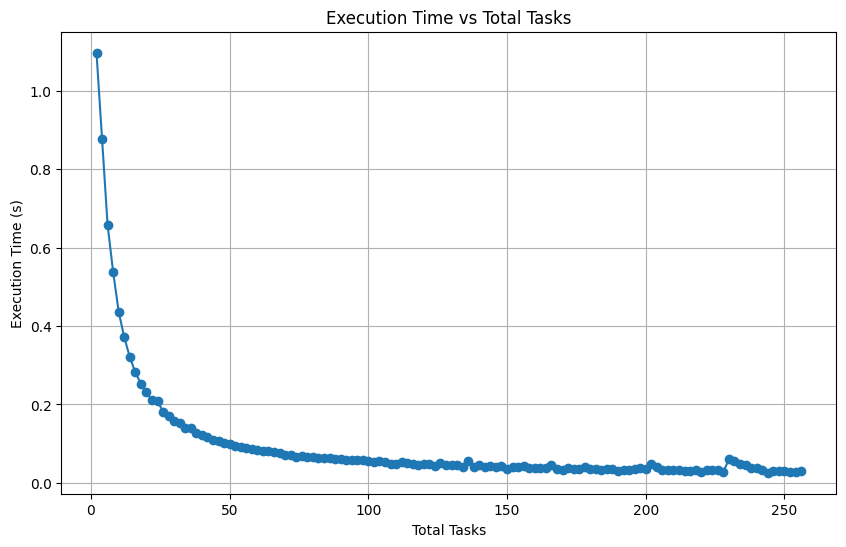

In [101]:
# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_strong_epyc.csv")

# Estrai le colonne
x = data["Total Tasks"]
y = data["Execution Time (s)"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Total Tasks')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Total Tasks')

plt.grid(True)
plt.show()

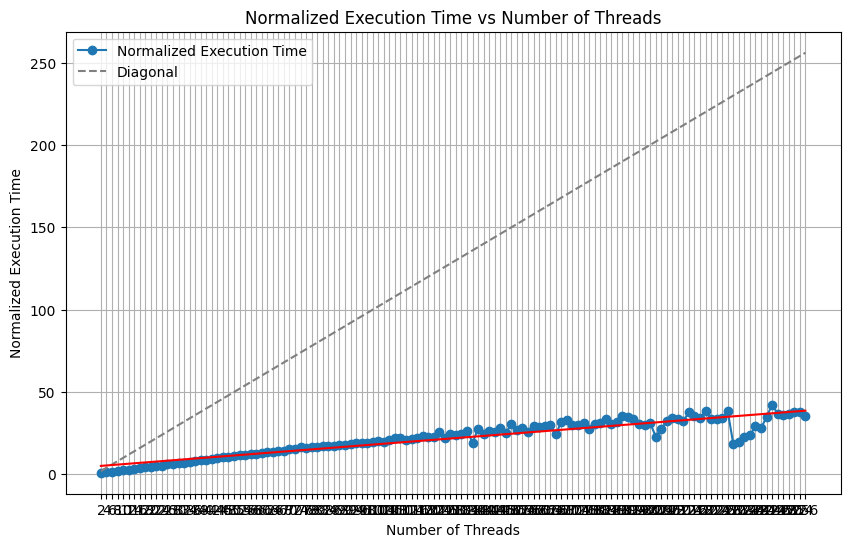

Coefficiente angolare: 0.13199515758030428
Intercetta: 4.879103361262899


In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_strong_epyc.csv")

# Estrai le colonne
x = data["Total Tasks"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution Time (s)"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Dividi i tempi di esecuzione per il valore di riferimento
y_normalized = reference_execution_time / y

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Normalized Execution Time')
plt.plot(x, x, linestyle='--', color='gray', label='Diagonal')

plt.xlabel('Number of Threads')
plt.ylabel('Normalized Execution Time')
plt.title('Normalized Execution Time vs Number of Threads')
plt.legend()

# Imposta l'asse x con incrementi di dieci
plt.xticks(x.flatten())

# Modello di regressione lineare
regression_model = LinearRegression()
regression_model.fit(x, y_normalized)
y_pred = regression_model.predict(x)

# Plot della regressione lineare
plt.plot(x, y_pred, color='red', linestyle='-', label='Linear Regression')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
coefficiente_angoalre = regression_model.coef_[0][0]
intercetta = regression_model.intercept_[0]
print("Coefficiente angolare:", coefficiente_angoalre)
print("Intercetta:", intercetta)


## STRONG SCALING EPYC (OMP)

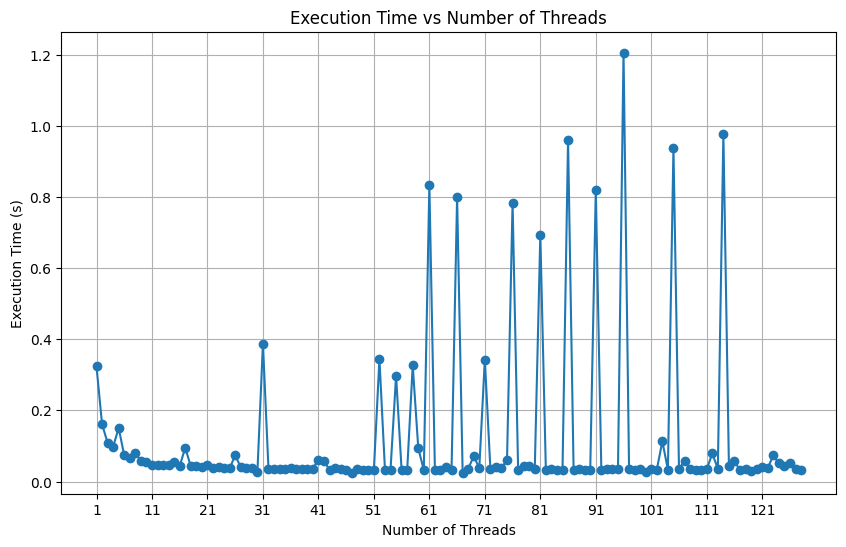

In [102]:
# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_strong_epyc.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"]
y = data["Execution_Time"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Number of Threads')

# Imposta l'asse x con incrementi di dieci
plt.xticks(np.arange(min(x), max(x)+1, 10))

plt.grid(True)
plt.show()

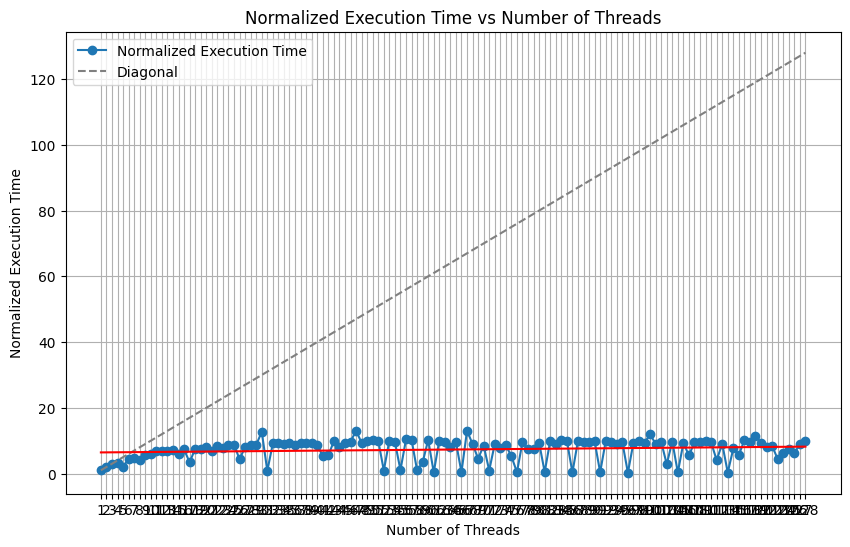

Coefficiente angolare: 0.013839724468902337
Intercetta: 6.43080509186873


In [117]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_strong_epyc.csv")

# Estrai le colonne
x = data["OMP_NUM_THREADS"].values.reshape(-1, 1)  # Reshape per adattare il formato richiesto da scikit-learn
y = data["Execution_Time"].values.reshape(-1, 1)

# Calcola il valore di riferimento utilizzando il primo valore di esecuzione
reference_execution_time = y[0][0]

# Dividi i tempi di esecuzione per il valore di riferimento
y_normalized = reference_execution_time / y

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Normalized Execution Time')
plt.plot(x, x, linestyle='--', color='gray', label='Diagonal')

plt.xlabel('Number of Threads')
plt.ylabel('Normalized Execution Time')
plt.title('Normalized Execution Time vs Number of Threads')
plt.legend()

# Imposta l'asse x con incrementi di dieci
plt.xticks(x.flatten())

# Modello di regressione lineare
regression_model = LinearRegression()
regression_model.fit(x, y_normalized)
y_pred = regression_model.predict(x)

# Plot della regressione lineare
plt.plot(x, y_pred, color='red', linestyle='-', label='Linear Regression')

plt.grid(True)
plt.show()

# Coefficiente angolare e intercetta della retta di regressione
coefficiente_angoalre = regression_model.coef_[0][0]
intercetta = regression_model.intercept_[0]
print("Coefficiente angolare:", coefficiente_angoalre)
print("Intercetta:", intercetta)


## WEAK SCALING EPYC (MPI)

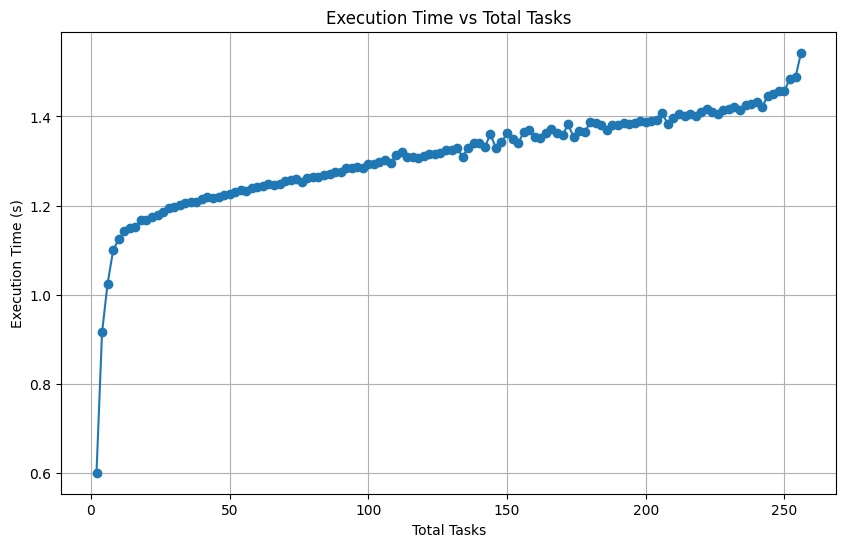

In [104]:
# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/mpi_weak_epyc.csv")

# Estrai le colonne
x = data["MPI_Processes"]
y = data["Execution_Time"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Total Tasks')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Total Tasks')
plt.grid(True)
plt.show()

## WEAK SCALING EPYC (OMP)

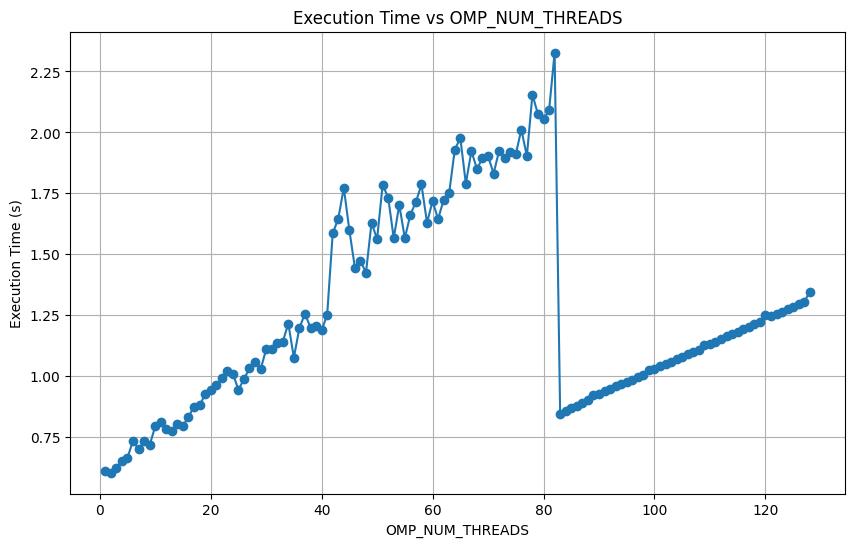

In [106]:
# Aggiungere efficency

# Leggi il file CSV utilizzando Pandas
data = pd.read_csv("csv/omp_weak_epyc.csv")

# Estrai le colonne
threads = data["OMP_NUM_THREADS"]
execution_times = data["Execution_Time"]

# Plotta i dati
plt.figure(figsize=(10, 6))
plt.plot(threads, execution_times, marker='o', linestyle='-')
plt.xlabel('OMP_NUM_THREADS')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs OMP_NUM_THREADS')
plt.grid(True)
plt.show()